In [126]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image

In [127]:
#set atribut
rows = ['jk', 'status_hubungan', 'tanggungan', 'edukasi', 'wiraswasta', 
        'pendapatan', 'penghasilan_luar', 'pinjaman', 'jangka_waktu','property',
       'kredit', 'status_pinjam']

#import get data 
csv_data = pd.read_csv(r'/home/shoera/virtualenv/credit_card_approval_03.csv', header=None, names=rows)

In [128]:
csv_data.head()

#set Nan data to zero (0)
csv_data = csv_data.fillna(0)

#show
csv_data.head()

,jk,status_hubungan,tanggungan,edukasi,wiraswasta,pendapatan,penghasilan_luar,pinjaman,jangka_waktu,property,kredit,status_pinjam
LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
#set data to dummies
setData = pd.get_dummies(csv_data[['jk', 'status_hubungan', 'tanggungan', 'edukasi', 'wiraswasta', 'pendapatan', 'penghasilan_luar', 'pinjaman', 'jangka_waktu','property', 'kredit']])

In [130]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

setData.head()

,pendapatan,penghasilan_luar,pinjaman,jangka_waktu,property,jk_0,jk_Female,jk_Male,status_hubungan_0,status_hubungan_No,status_hubungan_Yes,tanggungan_0,tanggungan_0,tanggungan_1,tanggungan_2,tanggungan_3+,edukasi_Graduate,edukasi_Not Graduate,wiraswasta_0,wiraswasta_No,wiraswasta_Yes,kredit_Rural,kredit_Semiurban,kredit_Urban
LP001002,5849,0.0,0.0,360.0,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
LP001005,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
LP001006,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
LP001008,6000,0.0,141.0,360.0,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [131]:
#set result Decision Tree
setResults = tree.DecisionTreeClassifier(criterion='entropy')

#get Train data
resultTrain = setResults.fit(setData, csv_data['status_pinjam'])

In [132]:
get_data = tree.export_graphviz(resultTrain, out_file=None,feature_names=list(setData.columns.values),
                               class_names=['N', 'Y'], rounded=True, filled=True)

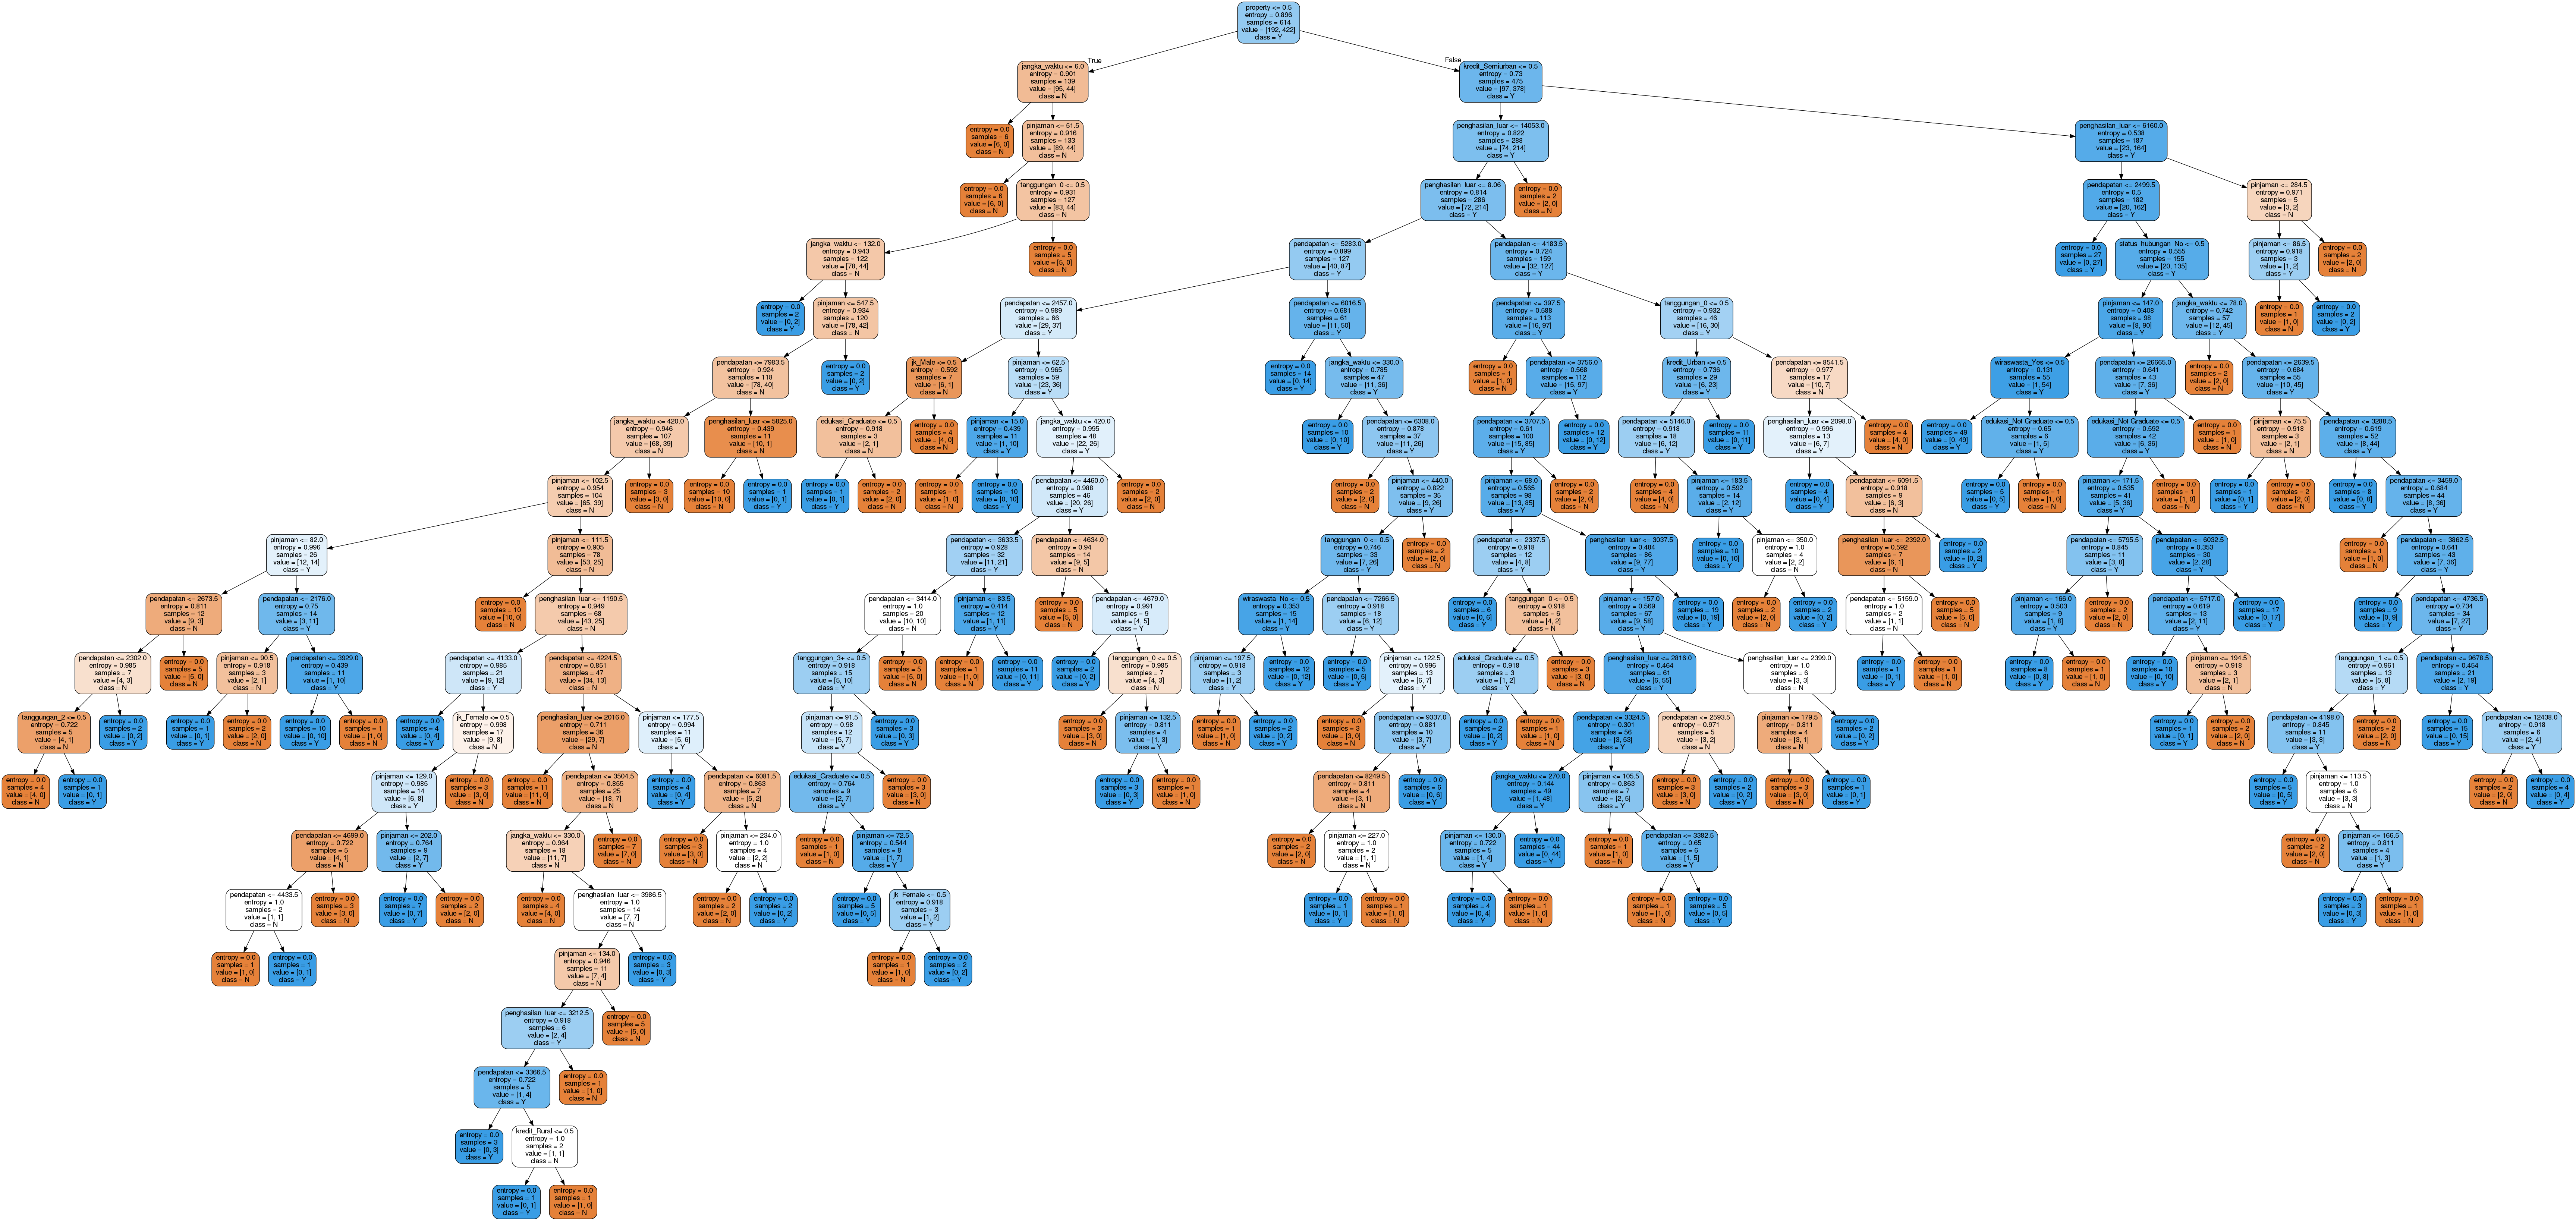

In [133]:
#set image Decision Tree
getGraph = pydotplus.graph_from_dot_data(get_data)

#show
Image(getGraph.create_png())

In [134]:
#test to predict

#(data inti)
#########################################################
pendapatan = 1000 
penghasilan_luar = 500.0

pinjaman = 1000.0
jangka_waktu = 360.0
propertys = 0.0

#(ya/ada = 1, No/tidak ada =2)
#########################################################
jk_0 = 0
jk_Female = 0
jk_Male = 1

hubungan_0 = 0
hubungan_No = 1
hubungan_Yes = 0

tanggungan_NaN = 0
tanggungan_0 = 0
tanggungan_1 = 0
tanggungan_2 = 0
tanggungan_3 = 1

bersekolah = 0
lulus_sekolah = 1

wiraswasta_0 = 0
wiraswasta_No = 0
wiraswasta_Yes = 1

kredit_Rural = 1
kredit_Semiurban = 0
kredit_Urban = 0

In [135]:
predict = resultTrain.predict([[
    pendapatan, penghasilan_luar, pinjaman, jangka_waktu, propertys, jk_0, jk_Female, jk_Male, hubungan_0, hubungan_No, hubungan_Yes, 
    tanggungan_NaN, tanggungan_0, tanggungan_1, tanggungan_2, tanggungan_3, bersekolah, lulus_sekolah, wiraswasta_0, wiraswasta_No,
    wiraswasta_Yes, kredit_Rural, kredit_Semiurban, kredit_Urban
]])

In [136]:
#swoh
if predict == 'Y':
    print('Berikan')
else:
    print('Jangan Berikan')

Berikan
